In [1]:
import pandas as pd
df = pd.read_parquet("https://github.com/xuwenhao/geektime-ai-course/raw/main/data/20_newsgroup_with_embedding.parquet")


In [3]:
df.head()

,text,target,title,n_tokens,embedding
0,I was wondering if anyone out there could enli...,7,rec.autos,121,"[-0.0391300804913044, 0.013502633199095726, -0..."
1,\nIt depends on your priorities. A lot of peo...,7,rec.autos,108,"[-0.0011249205563217402, -0.00376517535187304,..."
2,an excellent automatic can be found in the sub...,7,rec.autos,476,"[-0.018259447067975998, -0.008410007692873478,..."
3,: Ford and his automobile. I need information...,7,rec.autos,86,"[-0.012589422054588795, 0.006539034191519022, ..."
4,\nYo! Watch the attributions--I didn't say tha...,7,rec.autos,130,"[-0.0006192282889969647, -0.011226896196603775..."


In [5]:
type(df['embedding'][0])

numpy.ndarray

In [6]:
# 导入 NumPy 包，NumPy 是 Python 的一个开源数值计算扩展。这种工具可用来存储和处理大型矩阵，
# 比 Python 自身的嵌套列表（nested list structure)结构要高效的多。
import numpy as np
# 从 matplotlib 包中导入 pyplot 子库，并将其别名设置为 plt。
# matplotlib 是一个 Python 的 2D 绘图库，pyplot 是其子库，提供了一种类似 MATLAB 的绘图框架。
import matplotlib.pyplot as plt
import matplotlib

# 从 sklearn.manifold 模块中导入 TSNE 类。
# TSNE (t-Distributed Stochastic Neighbor Embedding) 是一种用于数据可视化的降维方法，尤其擅长处理高维数据的可视化。
# 它可以将高维度的数据映射到 2D 或 3D 的空间中，以便我们可以直观地观察和理解数据的结构。
from sklearn.manifold import TSNE

In [7]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)

In [9]:
matrix = np.vstack(df['embedding'].values)

In [12]:
min(df['target']), max(df['target'])

(0, 19)

In [10]:
vis_dims = tsne.fit_transform(matrix)

In [11]:
# 通过chatgpt生成：
# prompt：生成一个包含20种颜色的python数组，这些颜色要有一定的区分度，输出用hex码
colors = [
    "#FF0000", # 红色
    "#00FF00", # 绿色
    "#0000FF", # 蓝色
    "#FFFF00", # 黄色
    "#FF00FF", # 紫色
    "#00FFFF", # 青色
    "#800000", # 深红色
    "#008000", # 深绿色
    "#000080", # 深蓝色
    "#808000", # 深黄色
    "#800080", # 深紫色
    "#008080", # 深青色
    "#FF8000", # 橙色
    "#FF0080", # 粉色
    "#80FF00", # 浅绿色
    "#00FF80", # 蓝绿色
    "#8000FF", # 粉蓝色
    "#0080FF", # 浅蓝色
    "#FF8080", # 浅粉色
    "#80FF80"  # 浅青色
]


In [13]:
# 从降维后的坐标中分别获取所有数据点的横坐标和纵坐标
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

# 根据数据点的评分（target的范围为0-19，与colors数组对应）获取对应的颜色索引
color_indices = df.target.values

# 确保你的数据点和颜色索引的数量匹配
assert len(vis_dims) == len(df.target.values)

Text(0.5, 1.0, '20 news group')

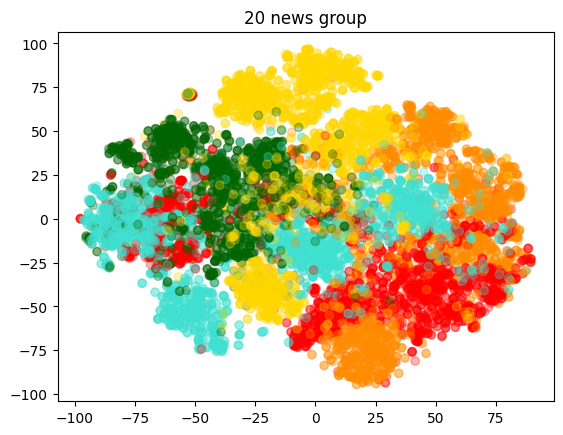

In [14]:
# 创建一个基于预定义颜色的颜色映射对象
colormap = matplotlib.colors.ListedColormap(colors)
# 使用 matplotlib 创建散点图，其中颜色由颜色映射对象和颜色索引共同决定，alpha 是点的透明度
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# 为图形添加标题
plt.title("20 news group")

聚类

In [18]:
import numpy as np
# 从 scikit-learn中导入 KMeans 类。KMeans 是一个实现 K-Means 聚类算法的类。
from sklearn.cluster import KMeans

# np.vstack 是一个将输入数据堆叠到一个数组的函数（在垂直方向）。
# 这里它用于将所有的 ada_embedding 值堆叠成一个矩阵。
# matrix = np.vstack(df.ada_embedding.values)

# 定义要生成的聚类数。
n_clusters = 4

# 创建一个 KMeans 对象，用于进行 K-Means 聚类。
# n_clusters 参数指定了要创建的聚类的数量；
# init 参数指定了初始化方法（在这种情况下是 'k-means++'）；
# random_state 参数为随机数生成器设定了种子值，用于生成初始聚类中心。
# n_init=10 消除警告 'FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4'
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42, n_init=10)

# 使用 matrix（我们之前创建的矩阵）来训练 KMeans 模型。这将执行 K-Means 聚类算法。
kmeans.fit(matrix)

# kmeans.labels_ 属性包含每个输入数据点所属的聚类的索引。
# 这里，我们创建一个新的 'Cluster' 列，在这个列中，每个数据点都被赋予其所属的聚类的标签。
df['cluster'] = kmeans.labels_

In [19]:
df.head()

,text,target,title,n_tokens,embedding,cluster
0,I was wondering if anyone out there could enli...,7,rec.autos,121,"[-0.0391300804913044, 0.013502633199095726, -0...",2
1,\nIt depends on your priorities. A lot of peo...,7,rec.autos,108,"[-0.0011249205563217402, -0.00376517535187304,...",2
2,an excellent automatic can be found in the sub...,7,rec.autos,476,"[-0.018259447067975998, -0.008410007692873478,...",2
3,: Ford and his automobile. I need information...,7,rec.autos,86,"[-0.012589422054588795, 0.006539034191519022, ...",2
4,\nYo! Watch the attributions--I didn't say tha...,7,rec.autos,130,"[-0.0006192282889969647, -0.011226896196603775...",0


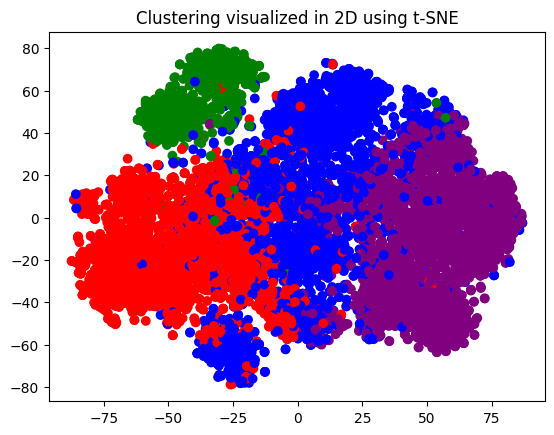

In [20]:
# 首先为每个聚类定义一个颜色。
colors = ["red", "green", "blue", "purple"]

# 然后，你可以使用 t-SNE 来降维数据。这里，我们只考虑 'embedding' 列。
tsne_model = TSNE(n_components=2, random_state=42)
vis_data = tsne_model.fit_transform(matrix)

# 现在，你可以从降维后的数据中获取 x 和 y 坐标。
x = vis_data[:, 0]
y = vis_data[:, 1]

# 'Cluster' 列中的值将被用作颜色索引。
color_indices = df['cluster'].values

# 创建一个基于预定义颜色的颜色映射对象
colormap = matplotlib.colors.ListedColormap(colors)

# 使用 matplotlib 创建散点图，其中颜色由颜色映射对象和颜色索引共同决定
plt.scatter(x, y, c=color_indices, cmap=colormap)

# 为图形添加标题
plt.title("Clustering visualized in 2D using t-SNE")

# 显示图形
plt.show()

搜索

In [23]:
# cosine_similarity 函数计算两个嵌入向量之间的余弦相似度。
from openai.embeddings_utils import get_embedding, cosine_similarity
import openai

In [41]:
news_embedding = get_embedding(
        "car accidents",
        engine="text-embedding-ada-002"
    )

In [42]:
df["similarity"] = df.embedding.apply(lambda x: cosine_similarity(x, news_embedding))

In [47]:
for r in df.sort_values("similarity", ascending=False).head(5).text:
  print(r)

Cup holders (driving is an importantant enough undertaking)
Cellular phones and mobile fax machines (see above)
Vanity mirrors on the driver's side.
Ashtrays (smokers seem to think it's just fine to use the road)
Fake convertible roofs and vinyl roofs.
Any gold trim.

   I was recently thumbing through the 1993 Lemon-Aid New
Car Guide.  What I found was a car would be given a 'Recommended'
under the picture while a few sentences later noting how a
driver and passenger were virtually guaranteed to be killed
in a front end collision.  The most highly recommended small
car (The Civic) has the worst crash rating of all of the small
cars listed.  There were many such cases of 'great' vehicles
where you wouldn't survive an accident.  Is it only me, or is
safety not one of the most important factors when buying a car?



Insurance companies sure seem to go for No-Fault coverage.  Since the
majority of accidents are the cagers' fault, doesn't this imply that we
would have to pay much higher ra